In [2]:
import pandas as pd
import numpy as np

In [3]:

af=pd.read_csv('laptop_price.csv')

In [4]:

import seaborn as sns
import matplotlib as plt



In [5]:
af.columns=af.columns.str.lower()
af.price_euros=af.price_euros*500

In [6]:
af=af.rename(columns={'price_euros':'price_naira'})
del af['laptop_id']

<AxesSubplot:xlabel='price_naira', ylabel='Count'>

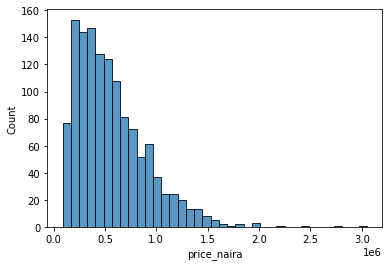

In [7]:
sns.histplot(af.price_naira)

In [8]:
obj=af.dtypes[af.dtypes==object].index

In [9]:
for col in obj:
    af[col]=af[col].str.lower().str.replace(' ','_')

In [10]:
af

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_naira
0,apple,macbook_pro,ultrabook,13.3,ips_panel_retina_display_2560x1600,intel_core_i5_2.3ghz,8gb,128gb_ssd,intel_iris_plus_graphics_640,macos,1.37kg,669845.0
1,apple,macbook_air,ultrabook,13.3,1440x900,intel_core_i5_1.8ghz,8gb,128gb_flash_storage,intel_hd_graphics_6000,macos,1.34kg,449470.0
2,hp,250_g6,notebook,15.6,full_hd_1920x1080,intel_core_i5_7200u_2.5ghz,8gb,256gb_ssd,intel_hd_graphics_620,no_os,1.86kg,287500.0
3,apple,macbook_pro,ultrabook,15.4,ips_panel_retina_display_2880x1800,intel_core_i7_2.7ghz,16gb,512gb_ssd,amd_radeon_pro_455,macos,1.83kg,1268725.0
4,apple,macbook_pro,ultrabook,13.3,ips_panel_retina_display_2560x1600,intel_core_i5_3.1ghz,8gb,256gb_ssd,intel_iris_plus_graphics_650,macos,1.37kg,901800.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,lenovo,yoga_500-14isk,2_in_1_convertible,14.0,ips_panel_full_hd_/_touchscreen_1920x1080,intel_core_i7_6500u_2.5ghz,4gb,128gb_ssd,intel_hd_graphics_520,windows_10,1.8kg,319000.0
1299,lenovo,yoga_900-13isk,2_in_1_convertible,13.3,ips_panel_quad_hd+_/_touchscreen_3200x1800,intel_core_i7_6500u_2.5ghz,16gb,512gb_ssd,intel_hd_graphics_520,windows_10,1.3kg,749500.0
1300,lenovo,ideapad_100s-14ibr,notebook,14.0,1366x768,intel_celeron_dual_core_n3050_1.6ghz,2gb,64gb_flash_storage,intel_hd_graphics,windows_10,1.5kg,114500.0
1301,hp,15-ac110nv_(i7-6500u/6gb/1tb/radeon,notebook,15.6,1366x768,intel_core_i7_6500u_2.5ghz,6gb,1tb_hdd,amd_radeon_r5_m330,windows_10,2.19kg,382000.0


# Splitting the data set

In [11]:
n=len(af)

In [12]:
val=int(n*0.2)
test=int(n*0.2)
train=(n-val-test)
val,test,train

(260, 260, 783)

In [13]:
val_af=af.iloc[:val]
test_af=af.iloc[val:val+test]
train_af=af.iloc[val+test:]

In [14]:
val_tag=np.log1p(val_af['price_naira'].values)
test_tag=np.log1p(test_af['price_naira'].values)
train_tag=np.log1p(train_af['price_naira'].values)

In [15]:
del val_af['price_naira']
del test_af['price_naira']
del train_af['price_naira']

# training  our train data set by first preparing the data

In [16]:
base=['inches']
af[base]

,inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3
...,...
1298,14.0
1299,13.3
1300,14.0
1301,15.6


In [17]:
def preparex(df):
    df=df.copy()
    base=['inches']

    for v in ['ultrabook','notebook','netbook','gaming','2_in_1_convertible','workstation']:
        df['typename_%s'%v]=(df['typename']==v).astype('int')
        base.append('typename_%s'%v)
    
    for v in ['8gb','16gb','4gb','2gb','12gb','6gb','32gb','24gb','64gb']:
        df['ram_%s'%v]=(df['ram']==v).astype('int')
        base.append('ram_%s'%v)
    
    for v in ['macos','no_os','windows_10','mac_os_x','linux','android','windows_10_s','chrome_os','windows_7']:
        df['opsys_%s'%v]=(df['opsys']==v).astype('int')
        base.append('opsys_%s'%v)
    
    features=df[base]
    return features.values
    

In [18]:
prep_train_values=preparex(train_af)

In [19]:
prep_train_values

array([[15.6,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [13.3,  1. ,  0. , ...,  0. ,  0. ,  0. ],
       [14. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       ...,
       [14. ,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [15.6,  0. ,  1. , ...,  0. ,  0. ,  0. ],
       [15.6,  0. ,  1. , ...,  0. ,  0. ,  0. ]])

# Training linear regression

In [20]:
def linear_regression(x,y,r=0.001):
    ones=np.ones(x.shape[0])
    x=np.column_stack([ones,x])
    
    xTrans=x.T.dot(x)
    xTrans=xTrans+r*np.eye(xTrans.shape[0])
    xInv=np.linalg.inv(xTrans)
    w=xInv.dot(x.T).dot(y)
    return w[0],w[1:]
    

In [21]:
ones=np.ones(x.shape[0])
ones

NameError: name 'x' is not defined

In [ ]:
w0,w=linear_regression(prep_train_values,train_tag,r=0.001)

In [ ]:
train_pred=w0+prep_train_values.dot(w)

In [ ]:
sns.histplot(train_pred, color='blue',bins=50)
sns.histplot(train_tag, color='red',bins=50)

In [ ]:
def rmse(pred,tag):
    err=tag-pred
    sqr_err=err**2
    mse=sqr_err.mean()
    return np.sqrt(mse)

In [ ]:
rmse(train_pred,train_tag)

# Training our val set and using our gotten w on it


In [ ]:
prep_val_values=preparex(val_af)

In [ ]:
prep_val_values

In [ ]:
val_pred=w0+prep_val_values.dot(w)

In [ ]:
sns.histplot(val_pred, color='blue',bins=50)
sns.histplot(val_tag, color='red',bins=50)

In [ ]:
rmse(val_pred,val_tag)

# Now combining both train and val data to use on test data

In [ ]:
full_af=pd.concat([train_af,val_af])
full_tag=np.concatenate([train_tag,val_tag])

In [ ]:
full_af.reset_index(drop=True)

In [ ]:
prep_full_values=preparex(full_af)

In [ ]:
w0,w=linear_regression(prep_full_values,full_tag,r=0.001)

In [ ]:
prep_test_values=preparex(test_af)
test_pred=w0+prep_test_values.dot(w)


In [ ]:
sns.histplot(val_pred, color='blue',bins=50)
sns.histplot(val_tag, color='red',bins=50)

In [ ]:
rmse(test_pred,test_tag)

In [ ]:
pc=test_af.iloc[9]
pc

In [ ]:
x_small=pd.DataFrame([pc])
x_small

In [ ]:
prep_af_small_values=preparex(x_small)
prep_af_small_values

In [ ]:
x_small_pred=w0+prep_af_small_values.dot(w)

In [ ]:
s=x_small_pred[0]

In [ ]:
r=np.expm1(s)
r

In [ ]:
w

In [ ]:
c=test_tag[9]

In [ ]:
b=np.expm1(c)
b

In [ ]:
r-b

In [ ]:
 #if v=='inches':
        #v=float(input())
       
    #else: print(v)

In [ ]:
lists=['company','product','typename','inches','screenresolution','cpu','ram','memory','gpu','opsys','weight']
ro=[]
for v in lists:
    v=float(input())
    ro.append(v)
ro

In [ ]:

wf=pd.DataFrame(data=[ro],columns=[lists])
wf

In [ ]:
prep_wf_values=preparex(wf)
prep_wf_values

In [ ]:
w0+prep_wf_values.dot(w)

In [ ]:
def biggie()